In [41]:
## Project Programs starts here....
print("A/B Testing & Regression Analysis Project | Marketing Campaign Analysis | Data Analysis Project")

A/B Testing & Regression Analysis Project | Marketing Campaign Analysis | Data Analysis Project


In [42]:
# ===================== Data Handling =====================
import pandas as pd            # Perform data loading, cleaning, and manipulation using DataFrames
import numpy as np             # Perform numerical and mathematical operations on arrays

# ===================== Data Visualization =====================
import matplotlib.pyplot as plt  # Create basic plots and charts (line, bar, scatter, etc.)
import seaborn as sns          # Create advanced and statistical visualizations with better aesthetics

# ===================== Statistics & Econometrics =====================
import scipy.stats as st         # Perform statistical tests and probability distributions
import statsmodels.api as sm     # Perform statistical modeling and regression analysis

# Time Series Analysis
from statsmodels.tsa.seasonal import seasonal_decompose  # Decompose time series into trend, seasonality, and residuals
from statsmodels.tsa.stattools import coint              # Perform cointegration test between time series variables

# ===================== Machine Learning =====================
from sklearn.linear_model import LinearRegression        # Build linear regression models
from sklearn.metrics import r2_score, mean_squared_error # Evaluate model performance

# ===================== Utilities =====================
import warnings                    # Handle and control warning messages
warnings.filterwarnings('ignore')  # Suppress unnecessary warnings for clean output


Business Problem :

As a marketing agency, our primary objective is to maximize the return on investment (ROI) for our clients' advertising campaigns. We have conducted two ad campaigns, one on Facebook and the other on AdWords, and we need to determine which platform yields better results in terms of clicks, conversions, and overall cost-effectiveness. By identifying the most effective platform, we can allocate our resources more efficiently and optimize our advertising strategies to deliver better outcomes for our clients.

Research Question:

Which ad platform is more effective in terms of conversions, clicks, and overall cost-effectiveness?

📊 Data Description

The dataset contains daily performance data for two advertising campaigns conducted in 2019:

Facebook Ad Campaign

Google AdWords Campaign

Each row represents one day of campaign activity, covering the period from
January 1, 2019 to December 31, 2019.

The dataset consists of 365 rows, enabling time-based performance analysis across the entire year.

The data captures multiple performance and cost metrics to evaluate campaign effectiveness and efficiency over time.

🔑 Key Features

Date

The calendar date associated with each campaign record.

Ad Views

The total number of times the advertisement was displayed.

Ad Clicks

The number of user clicks received on the advertisement.

Ad Conversions

The number of successful actions (e.g., purchases, sign-ups) generated from the ad.

Cost per Ad

The total cost incurred for running the Facebook ad campaign.

Click-Through Rate (CTR)

The ratio of ad clicks to ad views, measuring user engagement.

Conversion Rate

The ratio of conversions to clicks, indicating campaign effectiveness.

Cost per Click (CPC)

The average cost spent for each click on the advertisement.

In [43]:
# # Import the files module from Google Colab
# # This module allows interaction with local system files
# from google.colab import files


# # Open a file upload dialog in the browser
# # Allows the user to select files from their local machine
# uploaded = files.upload()

In [44]:

try:
    # Works only in Google Colab
    from google.colab import files
    uploaded = files.upload()
except ModuleNotFoundError:
    # Works in local Jupyter / VS Code
    print("Not running in Google Colab. Load file from local path.")

Not running in Google Colab. Load file from local path.


In [45]:
# Loading the Dataset
df = pd.read_csv(r'S:\zenspaces\zen_hands_on_projects\Data_Analysis_Projects_DA\P01_Marketing_Campaign_Analysis\data_sets\raw\AB_Testing_Marketing_Campaigns_Data.csv')

In [46]:
# Data Overview 
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2019,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30
1,1/2/2019,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2019,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2019,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2019,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40


In [47]:
# Display the number of rows and columns in the DataFrame
df.shape

(365, 17)

In [48]:
# To display the what datatype was assigned 
df.dtypes

Date                                               object
Facebook Ad Campaign                               object
Facebook Ad Views                                   int64
Facebook Ad Clicks                                  int64
Facebook Ad Conversions                             int64
Cost per Facebook Ad                               object
Facebook Click-Through Rate (Clicks / View)        object
Facebook Conversion Rate (Conversions / Clicks)    object
Facebook Cost per Click (Ad Cost / Clicks)         object
AdWords Ad Campaign                                object
AdWords Ad Views                                    int64
AdWords Ad Clicks                                   int64
AdWords Ad Conversions                              int64
Cost per AdWords Ad                                object
AdWords Click-Through Rate (Clicks / View)         object
AdWords Conversion Rate (Conversions / Click)      object
AdWords Cost per Click (Ad Cost / Clicks)          object
dtype: object

In [49]:
# Converting date to date-time
df['Date'] = pd.to_datetime(df['Date'])

In [50]:
# descriptive stats of the campaigns
df.describe()

# Generate descriptive statistics for all numerical columns
# Helps understand data distribution, central tendency, and spread

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions
count,365,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000
mean,2019-07-02 00:00:00,2179.687671,44.049315,11.742466,4717.19726,60.383562,5.980822
min,2019-01-01 00:00:00,1050.000000,15.000000,5.000000,3714.00000,31.000000,3.000000
25%,2019-04-02 00:00:00,1656.000000,35.000000,10.000000,4247.00000,49.000000,5.000000
50%,2019-07-02 00:00:00,2202.000000,43.000000,12.000000,4711.00000,60.000000,6.000000
75%,2019-10-01 00:00:00,2717.000000,54.000000,13.000000,5190.00000,73.000000,7.000000
max,2019-12-31 00:00:00,3320.000000,73.000000,19.000000,5760.00000,89.000000,9.000000
std,NaN,618.074639,12.140559,2.924786,561.11406,14.368225,1.628106


Comparing the Campaigns performance

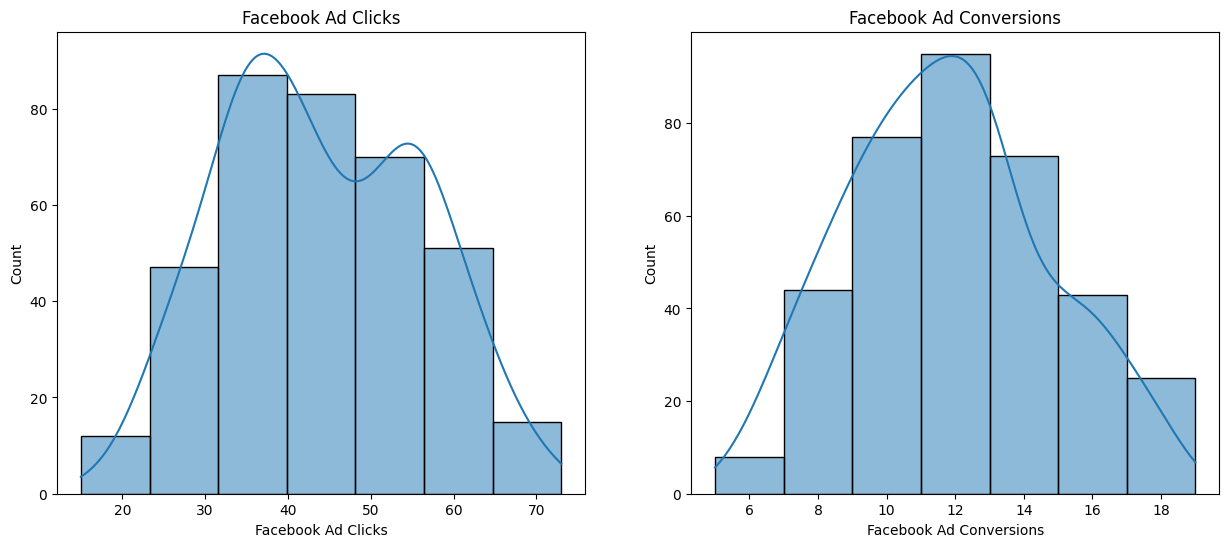

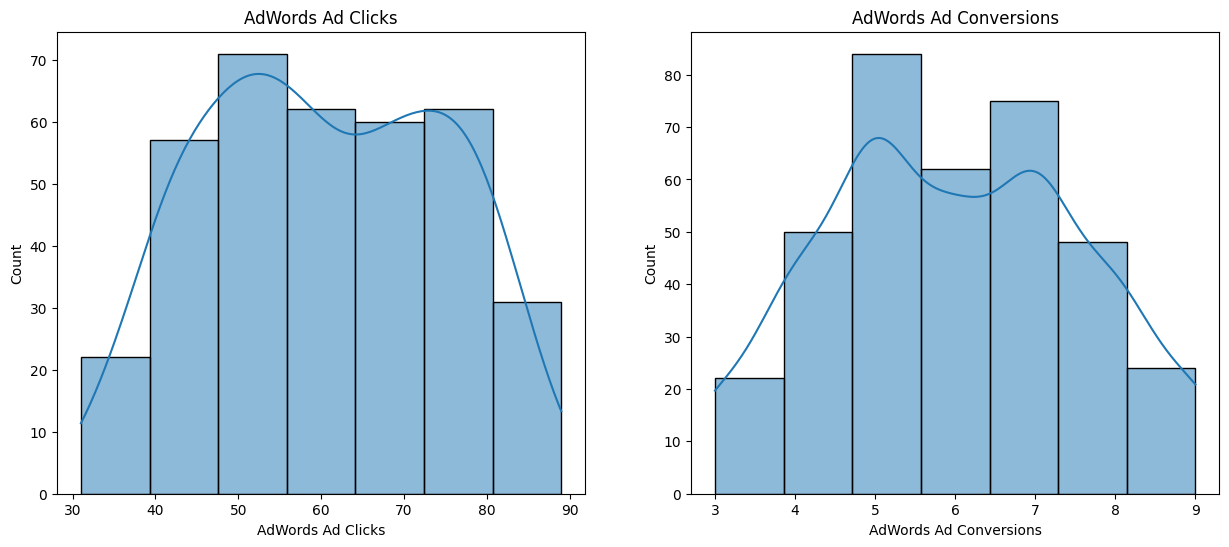

In [51]:
# Visualize the distribution of ad clicks and conversions
# for Facebook and AdWords campaigns using histograms with KDE
# to understand frequency, spread, and data distribution

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.title('Facebook Ad Clicks')
sns.histplot(df['Facebook Ad Clicks'], bins=7, edgecolor='k', kde=True)

plt.subplot(1, 2, 2)
plt.title('Facebook Ad Conversions')
sns.histplot(df['Facebook Ad Conversions'], bins=7, edgecolor='k', kde=True)

plt.show()

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.title('AdWords Ad Clicks')
sns.histplot(df['AdWords Ad Clicks'], bins=7, edgecolor='k', kde=True)

plt.subplot(1, 2, 2)
plt.title('AdWords Ad Conversions')
sns.histplot(df['AdWords Ad Conversions'], bins=7, edgecolor='k', kde=True)

plt.show()

All the histogram are showing somewhat symmetrical shape. This symmetrical shape suggests that the number of clicks and conversions is relatively evenly distributed. In other words, there are not many clicks or conversions that are outliers on either the high or low end.

### How frequently do we observe days with high numbers of conversions compared to days with low numbers of conversions?

In [52]:
# Create a function to classify ad conversion counts into meaningful categories
# and apply it to Facebook and AdWords conversion columns for analysis

# Define a function to create conversion categories based on conversion count
def create_conversion_category(conversion_col):

    # Initialize an empty list to store category labels
    category = []

    # Loop through each conversion value in the specified column
    for conversion in df[conversion_col]:

        # Assign category if conversions are less than 6
        if conversion < 6:
            category.append('less than 6')

        # Assign category if conversions are between 6 and 10
        elif 6 <= conversion < 11:
            category.append('6 - 10')

        # Assign category if conversions are between 11 and 15
        elif 11 <= conversion < 16:
            category.append('10-15')

        # Assign category if conversions are greater than 15
        else:
            category.append('more than 15')

    # Return the list of conversion categories
    return category

# applying function of different campaign's conversions
# Create a conversion category column for Facebook ads
df['Facebook Conversion Category'] = create_conversion_category('Facebook Ad Conversions')

# Create a conversion category column for AdWords ads
df['Adwords Conversion Category'] = create_conversion_category('AdWords Ad Conversions')

In [53]:
# Select specific conversion-related columns from the DataFrame
# and display the first few rows to preview the data and categories

df[['Facebook Ad Conversions',
    'Facebook Conversion Category',
    'AdWords Ad Conversions',
    'Adwords Conversion Category']].head()

,Facebook Ad Conversions,Facebook Conversion Category,AdWords Ad Conversions,Adwords Conversion Category
0,8,6 - 10,5,less than 6
1,12,10-15,6,6 - 10
2,8,6 - 10,4,less than 6
3,9,6 - 10,5,less than 6
4,7,6 - 10,7,6 - 10


In [54]:
# Calculate frequency of each conversion category for Facebook ads
df['Facebook Conversion Category'].value_counts()

Facebook Conversion Category
10-15           189
6 - 10          128
more than 15     47
less than 6       1
Name: count, dtype: int64

In [55]:
# Create a new DataFrame 'facebook' from the value counts of 'Facebook Conversion Category' column

facebook = pd.DataFrame(df['Facebook Conversion Category'].value_counts()).reset_index().rename(columns = {'Facebook Conversion Category':'Category'})
facebook

,Category,count
0,10-15,189
1,6 - 10,128
2,more than 15,47
3,less than 6,1


In [56]:
# This block counts the occurrences of each unique value in the 'AdWords Ad Conversions' column
# of the DataFrame 'df' and displays them. It helps understand how many times each conversion
# type appears in the dataset.

df['AdWords Ad Conversions'].value_counts()


AdWords Ad Conversions
5    84
7    75
6    62
4    50
8    48
9    24
3    22
Name: count, dtype: int64

In [57]:
# Count the occurrences of each unique value in 'Adwords Conversion Category' and convert to DataFrame
adwords = pd.DataFrame(
    df['Adwords Conversion Category'].value_counts()  # Counts unique values in the column
)

# Reset the index to turn the index (category names) into a normal column
adwords = adwords.reset_index()  

# Rename columns for clarity: 'index' becomes the category name, original counts column renamed to 'Category'
adwords = adwords.rename(columns={
    'index': 'Adwords Conversion Category',  # Original index column -> category column
    'Adwords Conversion Category': 'Category'  # Count column -> 'Category'
})

# Display the resulting DataFrame
adwords

,Category,count
0,6 - 10,209
1,less than 6,156


In [58]:
# Checking the columns name after re-names

print("Facebook DataFrame:\n", facebook)
print("AdWords DataFrame:\n", adwords)


Facebook DataFrame:
        Category  count
0         10-15    189
1        6 - 10    128
2  more than 15     47
3   less than 6      1
AdWords DataFrame:
       Category  count
0       6 - 10    209
1  less than 6    156


In [59]:
# Check column names of both DataFrames
print("Facebook columns:", facebook.columns.tolist())
print("AdWords columns:", adwords.columns.tolist())

# Remove any leading/trailing spaces in column names
facebook.columns = facebook.columns.str.strip()
adwords.columns = adwords.columns.str.strip()

# Rename the column to 'Category' in both DataFrames
facebook = facebook.rename(columns={facebook.columns[0]: 'Category', facebook.columns[1]: 'Facebook Count'})
adwords = adwords.rename(columns={adwords.columns[0]: 'Category', adwords.columns[1]: 'AdWords Count'})

Facebook columns: ['Category', 'count']
AdWords columns: ['Category', 'count']


In [60]:
# Merge Facebook and AdWords DataFrames based on the 'Category' column
# how='outer' ensures all categories from both DataFrames are included
# Missing values after merge (NaN) are replaced with 0 using fillna(0)

category_df = pd.merge(
    facebook,        # Left DataFrame
    adwords,         # Right DataFrame
    on='Category',   # Column to merge on
    how='outer',     # Outer join keeps all rows from both DataFrames
    validate='one_to_one'  # Ensures no duplicate categories in either table, prevents future warning
).fillna(0)          # Replace missing values (NaN) with 0

# Display the resulting merged DataFrame
category_df

,Category,Facebook Count,AdWords Count
0,10-15,189,0.0
1,6 - 10,128,209.0
2,less than 6,1,156.0
3,more than 15,47,0.0


In [61]:
#  print(category_df.shape)

category_df = category_df.iloc[[2,1,0,3]]
category_df


,Category,Facebook Count,AdWords Count
2,less than 6,1,156.0
1,6 - 10,128,209.0
0,10-15,189,0.0
3,more than 15,47,0.0


In [62]:

X_axis = np.arange(len(category_df))
X_axis

array([0, 1, 2, 3])

In [63]:
#Bar

- The data suggests Facebook had more frequent higher conversion days than AdWords, which either had very low conversion rates (less than 6) or moderate ones (6 - 10).  
- There is a significant variance in the number of high-conversion days between two different campaigns.  
- The absence of any days with conversions between 10 - 15 and more than 15 in AdWords indicates a need to review what strategies were changed or what external factors could have influenced these numbers.

## Do more clicks on the ad really lead to more sales?

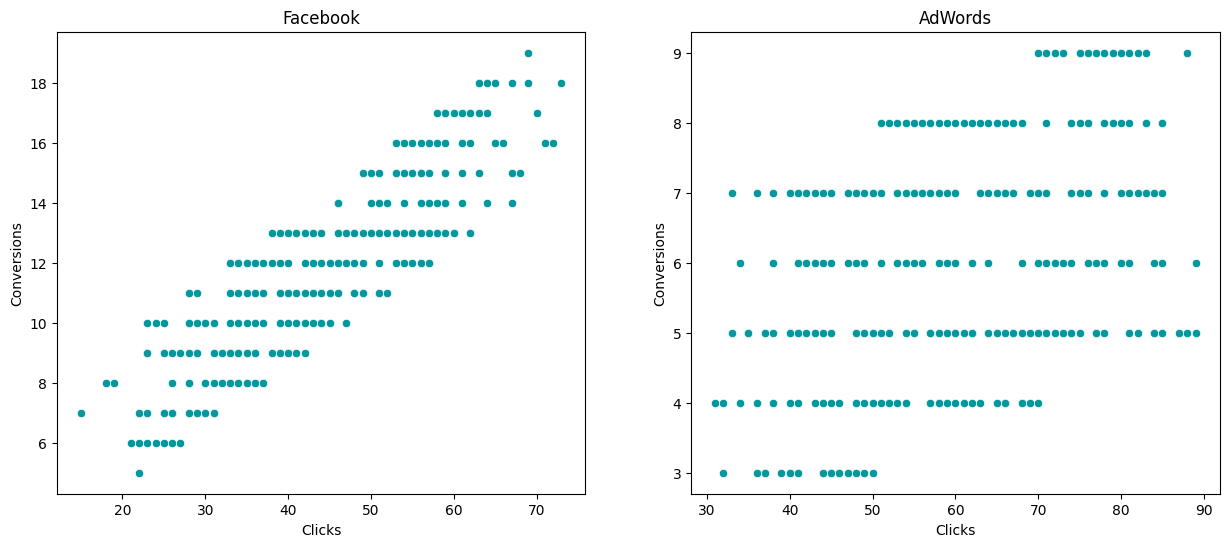

In [64]:
# ------------------------------
# Plotting scatter plots for Facebook and AdWords Clicks vs Conversions
# Using Matplotlib and Seaborn with a figure size and subplots
# ------------------------------

import matplotlib.pyplot as plt  # Matplotlib for plotting
import seaborn as sns            # Seaborn for advanced visualizations

# Create a figure of size 15x6 inches
plt.figure(figsize=(15,6))  # figsize = (width, height) in inches

# ------------------------------
# Subplot 1: Facebook Scatter Plot
# ------------------------------
plt.subplot(1,2,1)  # Create a subplot grid with 1 row, 2 columns; select the 1st plot
plt.title('Facebook')  # Set title for the first subplot

# Scatter plot: X = Facebook Ad Clicks, Y = Facebook Ad Conversions
sns.scatterplot(
    x = df['Facebook Ad Clicks'],       # X-axis values
    y = df['Facebook Ad Conversions'],  # Y-axis values
    color = '#03989E'                   # Color of points (teal)
)

plt.xlabel('Clicks')       # Label for X-axis
plt.ylabel('Conversions')  # Label for Y-axis

# ------------------------------
# Subplot 2: AdWords Scatter Plot
# ------------------------------
plt.subplot(1,2,2)  # Select the 2nd subplot in the 1x2 grid
plt.title('AdWords')  # Set title for the second subplot

# Scatter plot: X = AdWords Ad Clicks, Y = AdWords Ad Conversions
sns.scatterplot(
    x = df['AdWords Ad Clicks'],        # X-axis values
    y = df['AdWords Ad Conversions'],   # Y-axis values
    color = '#03989E'                   # Color of points (same teal)
)

plt.xlabel('Clicks')       # Label for X-axis
plt.ylabel('Conversions')  # Label for Y-axis

# ------------------------------
# Display both scatter plots side by side
# ------------------------------
plt.show()  # Render the figure


In [65]:
# Select only the 'Facebook Ad Conversions' and 'Facebook Ad Clicks' columns from the DataFrame `df`



facebook_corr = df[['Facebook Ad Conversions','Facebook Ad Clicks']].corr()

# Compute the correlation matrix for these two columns
# Correlation measures the strength and direction of the linear relationship between two variables
# Values range from -1 to 1:
#   1 => perfect positive correlation, -1 => perfect negative correlation, 0 => no correlation

# print
facebook_corr

,Facebook Ad Conversions,Facebook Ad Clicks
Facebook Ad Conversions,1.000000,0.873775
Facebook Ad Clicks,0.873775,1.000000


In [66]:
adwords_corr = df[['AdWords Ad Conversions','AdWords Ad Clicks']].corr()
adwords_corr

,AdWords Ad Conversions,AdWords Ad Clicks
AdWords Ad Conversions,1.000000,0.447993
AdWords Ad Clicks,0.447993,1.000000


In [67]:
# ------------------------------
# Correlation calculation for Facebook and AdWords
# ------------------------------

# Compute correlation matrix between 'Facebook Ad Conversions' and 'Facebook Ad Clicks'
# .corr() calculates linear correlation (values from -1 to 1)
facebook_corr = df[['Facebook Ad Conversions', 'Facebook Ad Clicks']].corr(numeric_only=True)  # numeric_only avoids FutureWarning

# Compute correlation matrix between 'AdWords Ad Conversions' and 'AdWords Ad Clicks'
adwords_corr = df[['AdWords Ad Conversions', 'AdWords Ad Clicks']].corr(numeric_only=True)  # numeric_only avoids FutureWarning

# Extract the correlation coefficient (off-diagonal value) and round it to 2 decimal places
corr_results = {
    'Facebook': round(facebook_corr.values[0, 1], 2),  # correlation between Facebook Conversions and Clicks
    'AdWords': round(adwords_corr.values[0, 1], 2)    # correlation between AdWords Conversions and Clicks
}

# Print a header for clarity
print('Correlation Coeff \n-----------------')

# Print Facebook correlation coefficient
print('Facebook :', round(facebook_corr.values[0, 1], 2))  # display rounded correlation value

# Print AdWords correlation coefficient
print('AdWords :', round(adwords_corr.values[0, 1], 2))    # display rounded correlation value


Correlation Coeff 
-----------------
Facebook : 0.87
AdWords : 0.45


# Correlation Analysis

## Facebook Ads

A correlation coefficient of **0.87** indicates a **strong positive linear relationship** between clicks on Facebook ads and sales. This suggests that as the number of clicks on Facebook ads increases, sales tend to increase as well.

This strong correlation indicates that **Facebook ads are highly effective** in driving sales, as a large portion of the variation in sales can be explained by the variation in clicks on Facebook ads.

Increasing investment in Facebook ads or optimizing their performance could potentially lead to even higher sales.

## AdWords Ads

A correlation coefficient of **0.45** indicates a **moderate positive linear relationship** between clicks on AdWords ads and sales. While there is still a positive relationship, it is not as strong as with Facebook ads.

This moderate correlation indicates that while **AdWords advertising contributes to sales**, its effectiveness may be influenced by other factors. Further analysis is needed to identify these factors and optimize AdWords campaigns accordingly.

---

# Hypothesis Testing

**Hypothesis:** Advertising on Facebook will result in a greater number of conversions compared to advertising on AdWords.

### Null Hypothesis (H0)  
There is no difference in the number of conversions between Facebook and AdWords, or the number of conversions from AdWords is greater than or equal to those from Facebook.  

\[
H_0: \mu_{\text{Facebook}} \leq \mu_{\text{AdWords}}
\]

### Alternate Hypothesis (H1)  
The number of conversions from Facebook is greater than the number of conversions from AdWords.  

\[
H_1: \mu_{\text{Facebook}} > \mu_{\text{AdWords}}
\]


In [68]:
# ------------------------------
# Mean Conversion Calculation
# ------------------------------

# Print header for mean conversions
print('Mean Conversion \n--------------')

# Calculate and print the mean of Facebook Ad Conversions, rounded to 2 decimals
print('Facebook :', round(df['Facebook Ad Conversions'].mean(), 2))  

# Calculate and print the mean of AdWords Ad Conversions, rounded to 2 decimals
print('AdWords :', round(df['AdWords Ad Conversions'].mean(), 2))  

# ------------------------------
# Hypothesis Testing (Independent t-test)
# ------------------------------

# Perform an independent t-test between Facebook and AdWords conversions
# equal_var=False uses Welch's t-test (does not assume equal population variance)
t_stats, p_value = st.ttest_ind(
    a=df['Facebook Ad Conversions'],  # sample 1
    b=df['AdWords Ad Conversions'],   # sample 2
    equal_var=False                    # Welch's t-test to avoid assuming equal variance
)

# Print the t-statistic and p-value
print('\nT statistic:', t_stats, '\np-value:', p_value)

# ------------------------------
# Hypothesis decision based on significance level (alpha = 0.05)
# ------------------------------

# Compare the p-value to the significance level of 0.05
if p_value < 0.05:
    print("\np-value is less than significance value (0.05), Reject the null hypothesis")  # evidence suggests Facebook has higher conversions
else:
    print("\np-value is greater than significance value (0.05), Accept the null hypothesis")  # no strong evidence, fail to reject null


Mean Conversion 
--------------
Facebook : 11.74
AdWords : 5.98

T statistic: 32.88402060758184 
p-value: 9.348918164530465e-134

p-value is less than significance value (0.05), Reject the null hypothesis


# Hypothesis Test Results: Facebook vs AdWords Conversions

## Mean Conversions

- The mean number of conversions from **Facebook ads** is **11.74**, which is substantially higher than the mean number of conversions from **AdWords ads (5.98)**.
- This suggests that, on average, **Facebook advertising is more effective** in generating conversions compared to AdWords advertising.

## T-Test Results

- The **T statistic (32.88)** measures the difference between the means of the two groups relative to the variation within the groups.  
  - A larger T statistic indicates a greater difference between the means.
- The **p-value (9.35e-134)** is extremely small, indicating **strong evidence against the null hypothesis**.

## Interpretation

- The results strongly support the **alternate hypothesis**, indicating that the number of conversions from Facebook advertising is indeed greater than the number of conversions from AdWords advertising.
- Based on the sample data analyzed, **Facebook advertising appears to be a more effective channel** for generating conversions compared to AdWords advertising.

## Recommendations

- Given the significant difference in conversion rates between Facebook and AdWords, consider **reallocating resources towards Facebook advertising efforts**.  
  Possible actions include:
  - Increasing ad spend on Facebook ads  
  - Expanding targeting efforts to reach more relevant audiences  
  - Experimenting with different ad formats to capitalize on the platform's effectiveness in driving conversions


- The data suggests Facebook had more frequent higher conversion days than AdWords, which either had very low conversion rates (less than 6) or moderate ones (6 - 10).  
- There is a significant variance in the number of high-conversion days between two different campaigns.  
- The absence of any days with conversions between 10 - 15 and more than 15 in AdWords indicates a need to review what strategies were changed or what external factors could have influenced these numbers.

## Regression Analysis

What will happen when I do go with the Facebook Ad? How many facebook ad conversions can I expect given a certain number of facebook ad clicks?

In [69]:
# ------------------------------
# Linear Regression: Predicting Facebook Conversions from Clicks
# ------------------------------

# Define the independent variable (feature) - Facebook Ad Clicks
X = df[['Facebook Ad Clicks']]  # Predictor variable for the regression model

# Define the dependent variable (target) - Facebook Ad Conversions
y = df[['Facebook Ad Conversions']]  # Response variable we want to predict

# Initialize the Linear Regression model from scikit-learn
reg_model = LinearRegression()  # Create a regression object

# Fit the model to the data (train the model)
reg_model.fit(X, y)  # Learn the relationship between clicks and conversions

# Make predictions using the same input data
prediction = reg_model.predict(X)  # Predicted conversions for the given clicks

# ------------------------------
# Model Evaluation
# ------------------------------

# Calculate the R² score (coefficient of determination) as a percentage
# R² shows how well the model explains the variability of the target variable
r2 = r2_score(y, prediction) * 100  # Multiply by 100 to convert to percentage

# Calculate the Mean Squared Error (MSE) - measures average squared difference between actual and predicted values
mse = mean_squared_error(y, prediction)

# Print the model performance metrics
print('Accuracy (R2 Score):', round(r2, 2), '%')  # Rounded R² score
print('Mean Squared Error:', round(mse, 2))       # Rounded MSE


Accuracy (R2 Score): 76.35 %
Mean Squared Error: 2.02


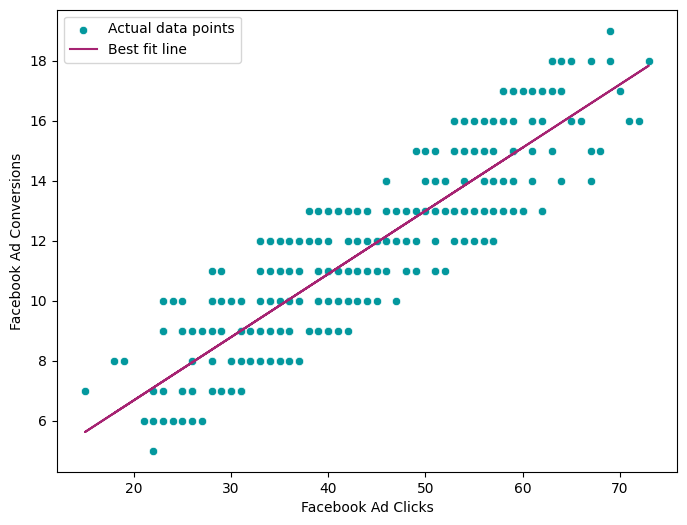

In [70]:
# ------------------------------
# Plotting Linear Regression for Facebook Ads
# ------------------------------

# Set the figure size for the plot (width=8 inches, height=6 inches)
plt.figure(figsize=(8, 6))  

# Plot actual data points as a scatter plot
# x-axis: Facebook Ad Clicks, y-axis: Facebook Ad Conversions
# color: teal (#03989E), label for legend: 'Actual data points'
sns.scatterplot(
    x=df['Facebook Ad Clicks'], 
    y=df['Facebook Ad Conversions'], 
    color='#03989E', 
    label='Actual data points'
)

# Plot the regression line (best fit line)
# x-axis: Facebook Ad Clicks, y-axis: predicted conversions
# color: pink (#A62372), label for legend: 'Best fit line'
plt.plot(
    df['Facebook Ad Clicks'], 
    prediction, 
    color='#A62372', 
    label='Best fit line'
)

# Display the legend to differentiate between actual points and regression line
plt.legend()  

# Display the plot
plt.show()  


In [71]:
# ------------------------------
# Predicting Conversions for Specific Number of Clicks
# ------------------------------

# Predict conversions for 50 clicks using the trained regression model
# reg_model.predict() expects a 2D array, so we pass [[50]]
# [0][0] extracts the single predicted value from the output array
print(f'For {50} Clicks, Expected Conversion : {round(reg_model.predict([[50]])[0][0], 2)}')

# Predict conversions for 80 clicks using the trained regression model
print(f'For {80} Clicks, Expected Conversion : {round(reg_model.predict([[80]])[0][0], 2)}')


For 50 Clicks, Expected Conversion : 13.0
For 80 Clicks, Expected Conversion : 19.31


# Linear Regression Analysis: Facebook Ad Conversions

## Model Performance

- The linear regression model has a reasonably good predictive power, with an **R² score of 76.35%**.
- This suggests that the model can **effectively predict Facebook ad conversions** based on the number of Facebook ad clicks.

## Business Insights

- The insights provided by the Linear Regression model can help businesses make **data-driven decisions** about:
  - Resource allocation  
  - Budget planning  
  - Campaign optimization  

- For example, knowing the **expected number of Facebook ad conversions** for a given number of ad clicks can help:
  - Set realistic campaign goals  
  - Optimize ad spend  
  - Assess the **ROI of Facebook advertising efforts**


### Analyzing Facebook Campaign metrics over time.

In [72]:
# ------------------------------
# Function to safely convert values to float
# ------------------------------
def safe_float_conversion(value):
    """
    Converts a value to float if it is a string.
    - Strips unwanted characters like '%' or '$'.
    - Returns the original value if it's already numeric.
    """
    if isinstance(value, str):
        # Remove common unwanted characters and convert to float
        return float(value.strip('%$'))  
    return value  # If already a numeric type (int/float), just return it

# ------------------------------
# Apply the function to relevant DataFrame columns
# ------------------------------

# Convert 'Facebook Click-Through Rate (Clicks / View)' from string percentages to floats
df['Facebook Click-Through Rate (Clicks / View)'] = df['Facebook Click-Through Rate (Clicks / View)'].apply(safe_float_conversion)

# Convert 'Facebook Conversion Rate (Conversions / Clicks)' from string percentages to floats
df['Facebook Conversion Rate (Conversions / Clicks)'] = df['Facebook Conversion Rate (Conversions / Clicks)'].apply(safe_float_conversion)

# Convert 'Facebook Cost per Click (Ad Cost / Clicks)' from strings with $ to floats
# We remove the first character (assumed '$') before passing to safe_float_conversion
df['Facebook Cost per Click (Ad Cost / Clicks)'] = df['Facebook Cost per Click (Ad Cost / Clicks)'].apply(
    lambda x: safe_float_conversion(x[1:]) if isinstance(x, str) else x
)

# Convert 'Cost per Facebook Ad' from strings with $ to floats
df['Cost per Facebook Ad'] = df['Cost per Facebook Ad'].apply(
    lambda x: safe_float_conversion(x[1:]) if isinstance(x, str) else x
)


In [73]:

# filtering for facebook campaign
df = df[['Date','Facebook Ad Views',
       'Facebook Ad Clicks', 'Facebook Ad Conversions', 'Cost per Facebook Ad',
       'Facebook Click-Through Rate (Clicks / View)',
       'Facebook Conversion Rate (Conversions / Clicks)',
       'Facebook Cost per Click (Ad Cost / Clicks)']]

df.head()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks)
0,2019-01-01,2116,18,8,126.0,0.83,42.73,7.14
1,2019-01-02,3106,36,12,104.0,1.15,34.04,2.91
2,2019-01-03,3105,26,8,102.0,0.84,31.45,3.89
3,2019-01-04,1107,27,9,71.0,2.45,34.76,2.62
4,2019-01-05,1317,15,7,78.0,1.10,47.59,5.38


At what times of the month or days of the week do we observe the conversions?

In [74]:
# extracting month and week day from the date column
df['month'] = df['Date'].dt.month
df['week'] = df['Date'].dt.weekday

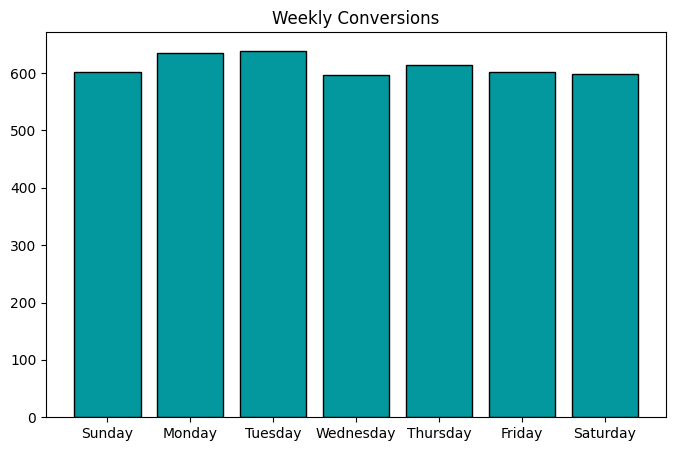

In [75]:
# ------------------------------
# Plotting Weekly Facebook Ad Conversions
# ------------------------------

# Set the figure size (width=8 inches, height=5 inches)
plt.figure(figsize=(8,5))  

# Set the title of the plot
plt.title('Weekly Conversions')  

# Group the DataFrame by 'week' and sum the 'Facebook Ad Conversions' for each week
weekly_conversion = df.groupby('week')[['Facebook Ad Conversions']].sum()  

# List of week names in order to label the x-axis
week_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']  

# Create a bar chart
# x-axis: day names, y-axis: total Facebook Ad Conversions for each day
# color: teal (#03989E), edgecolor: black ('k') for bar borders
plt.bar(
    week_names, 
    weekly_conversion['Facebook Ad Conversions'], 
    color='#03989E', 
    edgecolor='k'
)

# Display the plot
plt.show()  


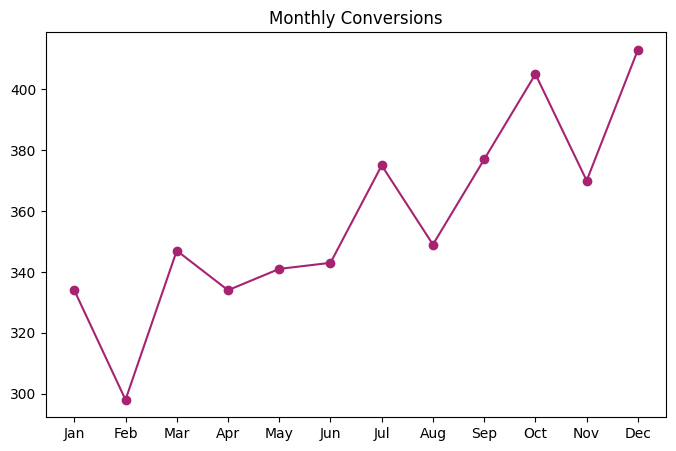

In [76]:
# ------------------------------
# Plotting Monthly Facebook Ad Conversions
# ------------------------------

# Set the figure size (width=8 inches, height=5 inches)
plt.figure(figsize=(8,5))  

# Set the title of the plot
plt.title('Monthly Conversions')  

# Group the DataFrame by 'month' and sum the 'Facebook Ad Conversions' for each month
monthly_conversion = df.groupby('month')[['Facebook Ad Conversions']].sum()  

# List of month names in order to label the x-axis
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']  

# Create a line plot with markers
# x-axis: month names, y-axis: total Facebook Ad Conversions for each month
# '-o' means solid line with circular markers, color: pink (#A62372)
plt.plot(
    month_names, 
    monthly_conversion['Facebook Ad Conversions'], 
    '-o', 
    color='#A62372'
)

# Display the plot
plt.show()  


# Facebook Ads Conversions Analysis: Weekly and Monthly Trends

## Weekly Conversions

- Across the weekdays over a year, the **total number of conversions remains relatively consistent**, indicating steady engagement throughout the week.
- **Mondays and Tuesdays consistently exhibit the highest conversion rates**, suggesting that the beginning of the workweek sees heightened user engagement or responsiveness to marketing efforts.

## Monthly Conversions

- Examining the monthly trend in conversions reveals an **overall upward trajectory**, indicating a general increase in conversions over time.
- Certain months stand out with variations in conversion rates:
  - **February, April, May, June, August, and November** experience a decline in conversions compared to neighboring months.
- These periods of decreased conversion rates could be influenced by factors such as:
  - Seasonal fluctuations  
  - Changes in consumer behavior  
  - Adjustments in marketing strategies  

## Cost Per Conversion (CPC)

- **Cost Per Conversion (CPC)** is a key metric used to evaluate the **cost-effectiveness and profitability** of an online advertising campaign.
- CPC helps marketers understand **how much is spent to acquire each conversion**, allowing them to:
  - Optimize ad spending  
  - Improve targeting strategies  
  - Increase overall ROI of campaigns


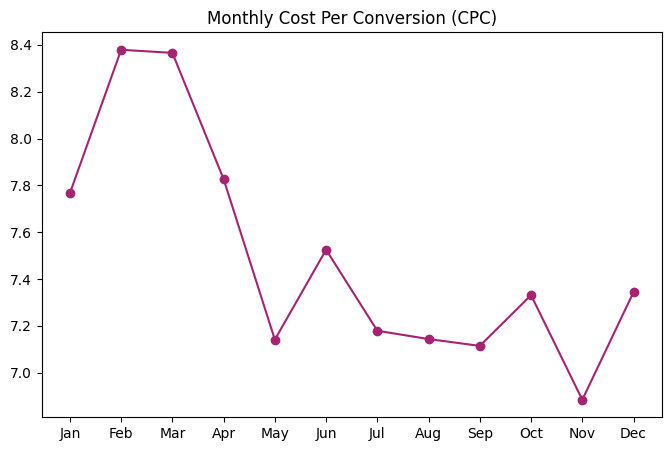

In [77]:
# ------------------------------
# Plotting Monthly Cost Per Conversion (CPC) for Facebook Ads
# ------------------------------

# Set the figure size (width=8 inches, height=5 inches)
plt.figure(figsize=(8,5))  

# Set the title of the plot
plt.title('Monthly Cost Per Conversion (CPC)')  

# Group the DataFrame by 'month' and sum relevant columns
# Summing total Facebook Ad Conversions and total Cost per Facebook Ad for each month
monthly_df = df.groupby('month')[['Facebook Ad Conversions', 'Cost per Facebook Ad']].sum()  

# Calculate Cost per Conversion (CPC) for each month
# CPC = Total Cost / Total Conversions
monthly_df['Cost per Conversion'] = monthly_df['Cost per Facebook Ad'] / monthly_df['Facebook Ad Conversions']  

# Plot the monthly CPC trend as a line plot with markers
# '-o' = solid line with circular markers, color: pink (#A62372)
plt.plot(
    month_names, 
    monthly_df['Cost per Conversion'], 
    '-o', 
    color='#A62372'
)

# Display the plot
plt.show()  


# Facebook Ads: Cost Per Conversion (CPC) Analysis

## CPC Trend Overview

- The **Cost Per Conversion (CPC)** trend over the 12-month period shows some fluctuations but overall remains within a relatively stable range.  
- **May and November** have the **lowest CPC values**, indicating potentially more cost-effective advertising or higher conversion rates during these periods.  
- **February** has the **highest CPC value**, suggesting that advertising costs may be relatively higher during this month compared to others.  

## Insights and Recommendations

- Lower CPC values in certain months (e.g., May and November) could indicate periods of **higher advertising effectiveness** or **more favorable market conditions**.  
- Consider **allocating more advertising budget** to months with historically lower CPC values to **maximize ROI**.  

## Strategic Question

- Is there a **long-term equilibrium relationship** between advertising spend and conversion rates that suggests a **stable, proportional impact of budget changes on conversions over time**?  
  - Investigating this could help in **forecasting conversions** and **optimizing budget allocation** across months or campaigns.


In [78]:
# ------------------------------
# Cointegration Test: Advertising Spend vs Conversions
# ------------------------------

# Perform the cointegration test between 'Cost per Facebook Ad' and 'Facebook Ad Conversions'
# coint() returns: test statistic, p-value, critical values
score, p_value, _ = coint(df['Cost per Facebook Ad'], df['Facebook Ad Conversions'])

# Print the cointegration test statistic and p-value
print('Cointegration test score:', score)
print('P-value:', p_value)

# Decision based on significance level (alpha = 0.05)
# Null Hypothesis (H0): The two time series are not cointegrated (no stable long-term relationship)
# Alternate Hypothesis (H1): The two time series are cointegrated (stable long-term relationship)
if p_value < 0.05:
    print("\np-value is less than significance value (0.05), Reject the null hypothesis")
    print("=> There is a stable, long-term equilibrium relationship between ad spend and conversions.")
else:
    print("\np-value is greater than significance value (0.05), Accept the null hypothesis")
    print("=> No evidence of a stable long-term relationship between ad spend and conversions.")


Cointegration test score: -14.755428385103224
P-value: 2.133737597906056e-26

p-value is less than significance value (0.05), Reject the null hypothesis
=> There is a stable, long-term equilibrium relationship between ad spend and conversions.


# Cointegration Analysis: Advertising Spend vs Conversions

## Test Results

- Since the **p-value is significantly lower than the chosen significance level (0.05)**, we reject the null hypothesis.  
- This indicates that there is a **long-term equilibrium relationship** between advertising spend (cost) and conversions.

## Business Insights

- Understanding the **stable relationship between ad spend and conversions** allows businesses to optimize their advertising strategies effectively.  
- By investing in campaigns that demonstrate a **strong return on investment (ROI)** and adjusting spending based on performance, companies can:  
  - **Maximize conversions**  
  - **Minimize advertising costs**  
  - Make more **data-driven budgeting decisions**


In [79]:
print("End of the project")

End of the project
